In [1]:
import os
home=os.path.expanduser("~")

In [2]:
print home

C:\Users\400T6B


In [3]:
import findspark
findspark.init(os.path.join(home,"Downloads","spark-2.0.0-bin-hadoop2.6"))

In [4]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .config('spark.sql.warehouse.dir','file:///C:\Users\code\s_201110216\data')\
    .getOrCreate()

In [5]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).config('spark.sql.warehouse.dir','file:///C:\Users\code\s_201110216\data').getOrCreate()

In [6]:
print spark.version

2.0.0


In [7]:
print spark.version
print spark.conf.get('spark.app.name')
print spark.conf.get('spark.master')
print spark.conf.get('spark.driver.host')

2.0.0
pyspark-shell
local[*]
117.16.43.198


In [8]:
myList=[1,2,3,4,5,6,7]
myRdd1 = spark.sparkContext.parallelize(myList)
myRdd1.take(3)

[1, 2, 3]

In [9]:
myRdd2=spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_wiki.txt"))
print myRdd2.first()

Wikipedia


In [10]:
wc2=myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1],x[0]))\
    .sortByKey(False)\
    .take(10)

In [11]:
print type(wc2)
for i in wc2:
    print i

<type 'list'>
(7, u'Spark')
(6, u'Apache')
(5, u'\uc544\ud30c\uce58')
(4, u'\uc2a4\ud30c\ud06c')
(3, u'the')
(2, u'an')
(1, u'and')
(1, u'\uc18c\uc2a4')
(1, u'is')
(1, u'Wikipedia')


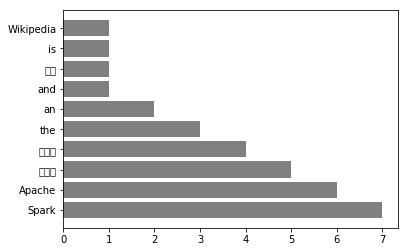

In [12]:
% matplotlib inline
import matplotlib.pyplot as plt

count = map(lambda x: x[0], wc2)
word = map(lambda x: x[1], wc2)
plt.barh(range(len(count)), count, color = 'grey')
plt.yticks(range(len(count)), word)
plt.show()

In [13]:
%%writefile src/ds_spark_rdd_hello.py
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
import pyspark
def doIt():
    print "---------RESULT-----------"
    print spark.version
    spark.conf.set("spark.logConf","false")
    rdd=spark.sparkContext.parallelize(range(1000), 10)
    print "mean=",rdd.mean()
    nums = spark.sparkContext.parallelize([1, 2, 3, 4])
    squared = nums.map(lambda x: x * x).collect()
    for num in squared:
        print "%i " % (num)

if __name__ == "__main__":
    myConf=pyspark.SparkConf()
    spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()
    doIt()
    spark.stop()
    

Overwriting src/ds_spark_rdd_hello.py


In [14]:
!C:\Users\400T6B\Downloads\spark-2.0.0-bin-hadoop2.6\bin\spark-submit code\s_201110216\src\ds_spark_rdd_hello.py

C:\ProgramData\Anaconda2\python.exe: can't open file 'C:/Users/400T6B/code/s_201110216/code/s_201110216/src/ds_spark_rdd_hello.py': [Errno 2] No such file or directory


In [15]:
import os
def doIt():
    print "---------RESULT-----------"
    print spark.version
    spark.conf.set("spark.logConf","false")
    rdd=spark.sparkContext.parallelize(range(1000), 10)
    print "mean=",rdd.mean()
    nums = spark.sparkContext.parallelize([1, 2, 3, 4])
    squared = nums.map(lambda x: x * x).collect()
    for num in squared:
        print "%i " % (num)
        
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()
doIt()

---------RESULT-----------
2.0.0
mean= 499.5
1 
4 
9 
16 


In [16]:
documents = spark.sparkContext.textFile("data/ds_spark_wiki.txt")\
    .map(lambda line: line.split(" "))

In [17]:
from pyspark.mllib.feature import HashingTF

hashingTF = HashingTF()
tf = hashingTF.transform(documents)
tf.collect()

[SparseVector(1048576, {253068: 1.0}),
 SparseVector(1048576, {36751: 1.0, 50570: 1.0, 68380: 1.0, 415281: 1.0, 511377: 1.0, 728364: 1.0, 862087: 1.0, 938426: 1.0, 999480: 1.0}),
 SparseVector(1048576, {63234: 1.0, 340190: 1.0, 357478: 1.0, 375592: 1.0, 458138: 1.0, 486171: 1.0, 598772: 1.0}),
 SparseVector(1048576, {938426: 4.0, 999480: 4.0}),
 SparseVector(1048576, {486171: 4.0, 1016271: 4.0}),
 SparseVector(1048576, {36757: 1.0, 225801: 1.0, 323305: 1.0, 453405: 1.0, 498679: 1.0, 518030: 1.0, 688842: 1.0, 762570: 1.0, 959994: 1.0}),
 SparseVector(1048576, {420843: 1.0, 550676: 1.0, 725041: 1.0, 782544: 1.0, 938426: 1.0, 959994: 2.0, 991590: 1.0, 993084: 1.0, 996703: 1.0, 999480: 1.0}),
 SparseVector(1048576, {50573: 1.0, 263739: 1.0, 892834: 1.0, 1014710: 1.0, 1035538: 1.0}),
 SparseVector(1048576, {3932: 1.0, 36751: 1.0, 192182: 1.0, 358969: 1.0, 363244: 1.0, 496856: 1.0, 546913: 1.0, 938426: 1.0, 951974: 1.0}),
 SparseVector(1048576, {69621: 1.0, 157580: 1.0, 219357: 1.0, 297436: 

In [18]:
myList=list()

In [19]:
print myList

[]


In [20]:
myList=[('1','kim, js',170),
        ('1','lee, sm', 175),
        ('2','lim, yg',180),
        ('2','lee',170)]
myDf=spark.createDataFrame(myList)

In [21]:
myDf.printSchema()
print myDf.take(1)

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)

[Row(_1=u'1', _2=u'kim, js', _3=170)]


In [22]:
names = ["kim","lee","lee","lim"]
items = ["espresso","latte","americano","affocato","long black","macciato"]
df = spark.createDataFrame([(names[i%4], items[i%5]) for i in range(100)],\
                           ["name","item"])
df.show(10)

+----+----------+
|name|      item|
+----+----------+
| kim|  espresso|
| lee|     latte|
| lee| americano|
| lim|  affocato|
| kim|long black|
| lee|  espresso|
| lee|     latte|
| lim| americano|
| kim|  affocato|
| lee|long black|
+----+----------+
only showing top 10 rows



In [23]:
df.select(df.item.substr(1, 3).alias("3chars")).show(3)

+------+
|3chars|
+------+
|   esp|
|   lat|
|   ame|
+------+
only showing top 3 rows



In [24]:
from pyspark.sql import Row
Person = Row('year','name', 'height')
row1=Person('1','kim, js',170)
print "row1: ",row1.year, row1.name

row1:  1 kim, js


In [25]:
myRows = [row1,
          Person('1','lee, sm', 175),
          Person('2','lim, yg',180),
          Person('2','lee',170)]

myDf=spark.createDataFrame(myRows)

In [26]:
print myDf.printSchema()
myDf.show()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: long (nullable = true)

None
+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [27]:
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType
mySchema=StructType([
    StructField("year", StringType(), True),
    StructField("name", StringType(), True),
    StructField("height", IntegerType(), True)
])
myDf=spark.createDataFrame(myRows, mySchema)
myDf.printSchema()
myDf.take(1)

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: integer (nullable = true)



[Row(year=u'1', name=u'kim, js', height=170)]

In [28]:
from pyspark.sql import Row

myList=[('1','kim, js',170),('1','lee, sm', 175),('2','lim, yg',180),('2','lee',170)]
myRdd = spark.sparkContext.parallelize(myList)

In [29]:
rddDf=myRdd.toDF()
rddDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [30]:
rddDf=spark.createDataFrame(myRdd)
rddDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [31]:
rddDf.where(rddDf._3 < 175)\
    .select([rddDf._1, rddDf._2]).show()
rddDf.groupby(rddDf._1).max().show()

+---+-------+
| _1|     _2|
+---+-------+
|  1|kim, js|
|  2|    lee|
+---+-------+

+---+-------+
| _1|max(_3)|
+---+-------+
|  1|    175|
|  2|    180|
+---+-------+



In [32]:
_myRdd=myRdd.map(lambda x:Row(year=int(x[0]),name=x[1],height=int(x[2])))
_myDf=spark.createDataFrame(_myRdd)
_myDf.printSchema()
_myDf.take(1)

root
 |-- height: long (nullable = true)
 |-- name: string (nullable = true)
 |-- year: long (nullable = true)



[Row(height=170, name=u'kim, js', year=1)]

In [33]:
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType, TimestampType
r1=Row(name="js1",age=10)
r2=Row(name="js2",age=20)
_myRdd=spark.sparkContext.parallelize([r1,r2])
_myRdd.collect()

[Row(age=10, name='js1'), Row(age=20, name='js2')]

In [34]:
schema=StructType([
    StructField("age", IntegerType(), True),
    StructField("name", StringType(), True),
    #StructField("created", TimestampType(), True)
])
_myDf=spark.createDataFrame(_myRdd,schema)
_myDf.printSchema()
_myDf.show()

root
 |-- age: integer (nullable = true)
 |-- name: string (nullable = true)

+---+----+
|age|name|
+---+----+
| 10| js1|
| 20| js2|
+---+----+



In [35]:
myDf.toPandas()

,year,name,height
0,1,"kim, js",170
1,1,"lee, sm",175
2,2,"lim, yg",180
3,2,lee,170


In [36]:
from pyspark.sql import Row
cfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.txt")
lines = spark.sparkContext.textFile(cfile)
parts = lines.map(lambda l: l.split(","))
people = parts.map(lambda p: Row(name=p[0], age=int(p[1].strip())))

_myDf = spark.createDataFrame(people)
_myDf.printSchema()
_myDf.collect()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



[Row(age=29, name=u'Michael'),
 Row(age=30, name=u'Andy'),
 Row(age=19, name=u'Justin')]

In [37]:
%%writefile data/ds_spark.csv
1,2,3,4
11,22,33,44
111,222,333,444

Overwriting data/ds_spark.csv


In [38]:
df = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true').load('data/ds_spark.csv')
df.show()

+---+---+---+---+
|  1|  2|  3|  4|
+---+---+---+---+
| 11| 22| 33| 44|
|111|222|333|444|
+---+---+---+---+



In [39]:
import numpy as np
np.array([float(x) for x in '1.658985	4.285136'.split('\t')])

array([ 1.658985,  4.285136])

In [40]:
import numpy as np
np.array([float(x) for x in '1.658985 4.285136'.split(' ')])

array([ 1.658985,  4.285136])

In [41]:
[x for x in '1.658995 	 4.285136']

['1',
 '.',
 '6',
 '5',
 '8',
 '9',
 '9',
 '5',
 ' ',
 '\t',
 ' ',
 '4',
 '.',
 '2',
 '8',
 '5',
 '1',
 '3',
 '6']

In [42]:
%%writefile data\\ds_spark_heightweight.txt
1	65.78	112.99
2	71.52	136.49
3	69.40	153.03
4	68.22	142.34
5	67.79	144.30
6	68.70	123.30
7	69.80	141.49
8	70.01	136.46
9	67.90	112.37
10	66.78	120.67
11	66.49	127.45
12	67.62	114.14
13	68.30	125.61
14	67.12	122.46
15	68.28	116.09
16	71.09	140.00
17	66.46	129.50
18	68.65	142.97
19	71.23	137.90
20	67.13	124.04
21	67.83	141.28
22	68.88	143.54
23	63.48	97.90
24	68.42	129.50
25	67.63	141.85
26	67.21	129.72
27	70.84	142.42
28	67.49	131.55
29	66.53	108.33
30	65.44	113.89
31	69.52	103.30
32	65.81	120.75
33	67.82	125.79
34	70.60	136.22
35	71.80	140.10
36	69.21	128.75
37	66.80	141.80
38	67.66	121.23
39	67.81	131.35
40	64.05	106.71
41	68.57	124.36
42	65.18	124.86
43	69.66	139.67
44	67.97	137.37
45	65.98	106.45
46	68.67	128.76
47	66.88	145.68
48	67.70	116.82
49	69.82	143.62
50	69.09	134.93

Overwriting data\\ds_spark_heightweight.txt


In [43]:
from pyspark.sql.types import *
rdd=spark.sparkContext\
    .textFile(os.path.join('data','ds_spark_heightweight.txt'))

tRdd=rdd.map(lambda x:x.split('\t'))
tDf=spark.createDataFrame(tRdd)

In [44]:
tDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)



In [45]:
tDf.take(3)

[Row(_1=u'1', _2=u'65.78', _3=u'112.99'),
 Row(_1=u'2', _2=u'71.52', _3=u'136.49'),
 Row(_1=u'3', _2=u'69.40', _3=u'153.03')]

In [46]:
tDf=tDf.withColumn("id",tDf['_1'].cast("integer")).drop('_1')
tDf=tDf.withColumn("height",tDf['_2'].cast("double")).drop('_2')
tDf=tDf.withColumn("weight",tDf['_3'].cast("double")).drop('_3')

In [47]:
tDf.take(1)

[Row(id=1, height=65.78, weight=112.99)]

In [48]:
#import numpy as np
#myRdd=rdd.map(lambda line:np.array([float(x) for x in line.split('\t')]))
tRdd=rdd.map(lambda line:[float(x) for x in line.split('\t')])
tRdd.take(1)

[[1.0, 65.78, 112.99]]

In [49]:
import numpy as np
tDf=spark.createDataFrame(tRdd,["id","weight","height"])
tDf.printSchema()
tDf.take(1)

root
 |-- id: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- height: double (nullable = true)



[Row(id=1.0, weight=65.78, height=112.99)]

In [50]:
import numpy as np
_weightRdd=tDf.rdd.map(lambda fields:fields[1]).collect()
_heightRdd=tDf.rdd.map(lambda fields:fields[2]).collect()
print np.array(_weightRdd)[:5]
print np.array(_heightRdd)[:5]

[ 65.78  71.52  69.4   68.22  67.79]
[ 112.99  136.49  153.03  142.34  144.3 ]


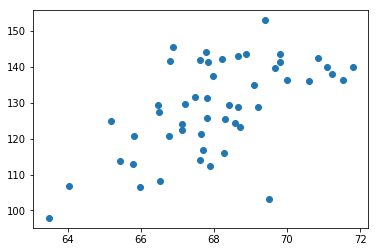

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(_weightRdd), np.array(_heightRdd),'o')
plt.show()


In [52]:
jfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.json")

_myDf= spark.read.json(jfile)
_myDf.filter(_myDf['age'] > 21).show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [53]:
import requests
r=requests.get("https://raw.githubusercontent.com/jokecamp/FootballData/master/World%20Cups/all-world-cup-players.json")
wc=r.json()

In [54]:
print type(wc), type(wc[0])

<type 'list'> <type 'dict'>


In [55]:
wc[0]

{u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada',
 u'ClubCountry': u'Argentina',
 u'Competition': u'World Cup',
 u'DateOfBirth': u'1905-5-5',
 u'FullName': u'\xc3ngel Bossio',
 u'IsCaptain': False,
 u'Number': u'',
 u'Position': u'GK',
 u'Team': u'Argentina',
 u'Year': 1930}

In [56]:
wcDF=spark.createDataFrame(wc)
wcDF.printSchema()
wcDF.take(1)

C:\Users\400T6B\Downloads\spark-2.0.0-bin-hadoop2.6\python\pyspark\sql\session.py:316: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)



[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubCountry=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930)]

In [57]:
wcRdd=spark.sparkContext.parallelize(wc)
wcRdd.take(1)

[{u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada',
  u'ClubCountry': u'Argentina',
  u'Competition': u'World Cup',
  u'DateOfBirth': u'1905-5-5',
  u'FullName': u'\xc3ngel Bossio',
  u'IsCaptain': False,
  u'Number': u'',
  u'Position': u'GK',
  u'Team': u'Argentina',
  u'Year': 1930}]

In [58]:
from pyspark.sql.types import *
wcSchema=StructType([
    StructField("Club", StringType(), True),
    StructField("ClubCountry", StringType(), True),
    StructField("Competition", StringType(), True),
    StructField("DateOfBirth", DateType(), True),
    StructField("FullName", StringType(), True),
    StructField("IsCaptain", BooleanType(), True),
    StructField("Number", IntegerType(), True),
    StructField("Position", StringType(), True),
    StructField("Team", StringType(), True),
    StructField("Year", IntegerType(), True)
])

wcDF=spark.createDataFrame(wcRdd)
wcDF.printSchema()
wcDF.take(1)

C:\Users\400T6B\Downloads\spark-2.0.0-bin-hadoop2.6\python\pyspark\sql\session.py:336: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)



[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubCountry=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930)]

In [59]:
from datetime import datetime
print datetime.strptime("11/25/1991", '%m/%d/%Y')

1991-11-25 00:00:00


In [60]:
wcDF=wcDF.withColumn('DoB', wcDF['DateOfBirth'].cast(DateType()))
wcDF=wcDF.withColumn('NumberInt', wcDF['Number'].cast("integer"))
wcDF.printSchema()
wcDF.take(1)

root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- DoB: date (nullable = true)
 |-- NumberInt: integer (nullable = true)



[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubCountry=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930, DoB=datetime.date(1905, 5, 5), NumberInt=None)]

In [61]:
_myDf.write.parquet(os.path.join("data","people.parquet"))
_pDf=spark.read.parquet(os.path.join("data","people.parquet"))
_pDf.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [62]:
myDf.printSchema()
myDf.show()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: integer (nullable = true)

+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [63]:
wcDF=wcDF.withColumnRenamed('ClubCountry','ClubNation')
wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubNation: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- DoB: date (nullable = true)
 |-- NumberInt: integer (nullable = true)



In [64]:
_name=myDf.select('name')
_name.rdd.collect()

[Row(name=u'kim, js'),
 Row(name=u'lee, sm'),
 Row(name=u'lim, yg'),
 Row(name=u'lee')]

In [65]:
r=Row(name=u'kim, js')
rd=r.asDict()
print rd.values()[0].split(',')

[u'kim', u' js']


In [66]:
myDf.where(myDf['height'] < 175)\
    .select(myDf['name'], myDf['height']).show()
myDf.groupby(myDf['year']).max().show()

+-------+------+
|   name|height|
+-------+------+
|kim, js|   170|
|    lee|   170|
+-------+------+

+----+-----------+
|year|max(height)|
+----+-----------+
|   1|        175|
|   2|        180|
+----+-----------+



In [67]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

toDoublefunc = udf(lambda x: float(x),DoubleType())
myDf = myDf.withColumn("heightD",toDoublefunc(myDf.height))

In [68]:
print int('1')

1


In [69]:
from pyspark.sql.functions import udf, struct
from pyspark.sql.types import IntegerType
toint=udf(lambda x:int(x),IntegerType())
myDf=myDf.withColumn("yearI",toint(myDf['year']))

myDf.printSchema()
myDf.show()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- heightD: double (nullable = true)
 |-- yearI: integer (nullable = true)

+----+-------+------+-------+-----+
|year|   name|height|heightD|yearI|
+----+-------+------+-------+-----+
|   1|kim, js|   170|  170.0|    1|
|   1|lee, sm|   175|  175.0|    1|
|   2|lim, yg|   180|  180.0|    2|
|   2|    lee|   170|  170.0|    2|
+----+-------+------+-------+-----+



In [70]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf
 
def uppercase(s):
    return s.upper()

upperUdf = udf(uppercase, StringType())
myDf = myDf.withColumn("nameUpper", upperUdf(myDf['name']))
myDf.show()

+----+-------+------+-------+-----+---------+
|year|   name|height|heightD|yearI|nameUpper|
+----+-------+------+-------+-----+---------+
|   1|kim, js|   170|  170.0|    1|  KIM, JS|
|   1|lee, sm|   175|  175.0|    1|  LEE, SM|
|   2|lim, yg|   180|  180.0|    2|  LIM, YG|
|   2|    lee|   170|  170.0|    2|      LEE|
+----+-------+------+-------+-----+---------+



In [71]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

height_udf = udf(lambda height: "taller" if height >=175 else "shorter", StringType())
heightDf=myDf.withColumn("height>175", height_udf(myDf.heightD))
heightDf.show()

+----+-------+------+-------+-----+---------+----------+
|year|   name|height|heightD|yearI|nameUpper|height>175|
+----+-------+------+-------+-----+---------+----------+
|   1|kim, js|   170|  170.0|    1|  KIM, JS|   shorter|
|   1|lee, sm|   175|  175.0|    1|  LEE, SM|    taller|
|   2|lim, yg|   180|  180.0|    2|  LIM, YG|    taller|
|   2|    lee|   170|  170.0|    2|      LEE|   shorter|
+----+-------+------+-------+-----+---------+----------+



In [72]:
myDf.describe().show()

+-------+------------------+------------------+------------------+
|summary|            height|           heightD|             yearI|
+-------+------------------+------------------+------------------+
|  count|                 4|                 4|                 4|
|   mean|            173.75|            173.75|               1.5|
| stddev|4.7871355387816905|4.7871355387816905|0.5773502691896257|
|    min|               170|             170.0|                 1|
|    max|               180|             180.0|                 2|
+-------+------------------+------------------+------------------+



In [73]:
myDf.select('yearI').show()

+-----+
|yearI|
+-----+
|    1|
|    1|
|    2|
|    2|
+-----+



In [74]:
wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubNation: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- DoB: date (nullable = true)
 |-- NumberInt: integer (nullable = true)



In [75]:
wcDF.createOrReplaceTempView("wc")
spark.sql("select Club,Team,Year from wc").show(1)

+--------------------+---------+----+
|                Club|     Team|Year|
+--------------------+---------+----+
|Club AtlÃ©tico Ta...|Argentina|1930|
+--------------------+---------+----+
only showing top 1 row



In [77]:
spark.catalog.listTables()

[Table(name=u'wc', database=None, description=None, tableType=u'TEMPORARY', isTemporary=True)]

In [78]:
wcDF.createOrReplaceTempView("wc")
wcPlayers=spark.sql("select FullName,Club,Team,Year from wc")

In [79]:
namesRdd=wcPlayers.rdd.map(lambda x: "Full name: "+x[0])
for e in namesRdd.take(5):
    print e

Full name: Ãngel Bossio
Full name: Juan Botasso
Full name: Roberto Cherro
Full name: Alberto Chividini
Full name: 


In [80]:
bucketDf=spark.createDataFrame([[1,["orange", "apple", "pineapple"]],
                                [2,["watermelon","apple","bananas"]]],
                               ["bucketId","items"])

In [81]:
bucketDf.show(truncate=False)

+--------+----------------------------+
|bucketId|items                       |
+--------+----------------------------+
|1       |[orange, apple, pineapple]  |
|2       |[watermelon, apple, bananas]|
+--------+----------------------------+



In [82]:
from pyspark.sql.functions import explode
bDf=bucketDf.select(bucketDf.bucketId,explode(bucketDf.items).alias('item'))

In [83]:
bDf.show()

+--------+----------+
|bucketId|      item|
+--------+----------+
|       1|    orange|
|       1|     apple|
|       1| pineapple|
|       2|watermelon|
|       2|     apple|
|       2|   bananas|
+--------+----------+



In [84]:
fDf=spark.createDataFrame([["orange", "F1"],
                            ["apple", "F2"],
                            ["pineapple","F3"],
                            ["watermelon","F4"],
                            ["bananas","F5"]],
                            ["item","itemId"])

In [85]:
fDf.show()

+----------+------+
|      item|itemId|
+----------+------+
|    orange|    F1|
|     apple|    F2|
| pineapple|    F3|
|watermelon|    F4|
|   bananas|    F5|
+----------+------+



In [87]:
joinDf=fDf.join(bDf, fDf.item==bDf.item, "outer")

In [88]:
joinDf.select(fDf.itemId,fDf.item,bDf.bucketId).show()

+------+----------+--------+
|itemId|      item|bucketId|
+------+----------+--------+
|    F5|   bananas|       2|
|    F1|    orange|       1|
|    F2|     apple|       1|
|    F2|     apple|       2|
|    F3| pineapple|       1|
|    F4|watermelon|       2|
+------+----------+--------+



In [89]:
myDf.show()

+----+-------+------+-------+-----+---------+
|year|   name|height|heightD|yearI|nameUpper|
+----+-------+------+-------+-----+---------+
|   1|kim, js|   170|  170.0|    1|  KIM, JS|
|   1|lee, sm|   175|  175.0|    1|  LEE, SM|
|   2|lim, yg|   180|  180.0|    2|  LIM, YG|
|   2|    lee|   170|  170.0|    2|      LEE|
+----+-------+------+-------+-----+---------+



In [90]:
from pyspark.sql.functions import when
_myDf=myDf.select(when(myDf['heightD'] >175.0, ">175")\
            .otherwise("<175").alias("how tall"))
_myDf.show()


+--------+
|how tall|
+--------+
|    <175|
|    <175|
|    >175|
|    <175|
+--------+



In [91]:
myDf.groupBy().avg().collect()

[Row(avg(height)=173.75, avg(heightD)=173.75, avg(yearI)=1.5)]

In [92]:
myDf.groupBy('year').agg({"heightD":"avg"}).show()

+----+------------+
|year|avg(heightD)|
+----+------------+
|   1|       172.5|
|   2|       175.0|
+----+------------+



In [94]:
import os
import urllib
_url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
_fname = os.path.join(os.getcwd(),'data','kddcup.data_10_percent.gz')
if(not os.path.exists(_fname)):
    print "%s data does not exist! retrieving.." % _fname
    _f=urllib.urlretrieve(_url,_fname)

In [95]:
_rdd = spark.sparkContext.textFile(_fname)

In [96]:
_rdd.count()

494021

In [97]:
_rdd.take(3)

[u'0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 u'0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 u'0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.']

In [98]:
_normal = _rdd.filter(lambda x: 'normal.' in x)
print _normal.count()

97278


In [99]:
_csvRdd=_rdd.map(lambda x: x.split(','))

In [100]:
print _csvRdd.take(1)

[[u'0', u'tcp', u'http', u'SF', u'181', u'5450', u'0', u'0', u'0', u'0', u'0', u'1', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'8', u'8', u'0.00', u'0.00', u'0.00', u'0.00', u'1.00', u'0.00', u'0.00', u'9', u'9', u'1.00', u'0.00', u'0.11', u'0.00', u'0.00', u'0.00', u'0.00', u'0.00', u'normal.']]


In [101]:
_kv = _csvRdd.map(lambda x: (x[41], 1))
_attack = _kv.reduceByKey(lambda x,y: x+y)

In [102]:
_attack.collect()

[(u'guess_passwd.', 53),
 (u'nmap.', 231),
 (u'warezmaster.', 20),
 (u'rootkit.', 10),
 (u'warezclient.', 1020),
 (u'smurf.', 280790),
 (u'pod.', 264),
 (u'neptune.', 107201),
 (u'normal.', 97278),
 (u'spy.', 2),
 (u'ftp_write.', 8),
 (u'phf.', 4),
 (u'portsweep.', 1040),
 (u'teardrop.', 979),
 (u'buffer_overflow.', 30),
 (u'land.', 21),
 (u'imap.', 12),
 (u'loadmodule.', 9),
 (u'perl.', 3),
 (u'multihop.', 7),
 (u'back.', 2203),
 (u'ipsweep.', 1247),
 (u'satan.', 1589)]

In [103]:
_normalRdd=_csvRdd.filter(lambda x: x[41]=="normal.")
_attackRdd=_csvRdd.filter(lambda x: x[41]!="normal.")

In [104]:
print _normalRdd.count()
print _attackRdd.count()

97278
396743


In [106]:
sum_counts = _kv.combineByKey(
    (lambda x: (x, 1)), # the initial value, with value x and count 1
    (lambda acc, value: (acc[0]+value, acc[1]+1)), # how to combine a pair value with the accumulator: sum value, and increment count
    (lambda acc1, acc2: (acc1[0]+acc2[0], acc1[1]+acc2[1])) # combine accumulators
)

sum_counts.collectAsMap()

{u'back.': (2203, 2203),
 u'buffer_overflow.': (30, 30),
 u'ftp_write.': (8, 8),
 u'guess_passwd.': (53, 53),
 u'imap.': (12, 12),
 u'ipsweep.': (1247, 1247),
 u'land.': (21, 21),
 u'loadmodule.': (9, 9),
 u'multihop.': (7, 7),
 u'neptune.': (107201, 107201),
 u'nmap.': (231, 231),
 u'normal.': (97278, 97278),
 u'perl.': (3, 3),
 u'phf.': (4, 4),
 u'pod.': (264, 264),
 u'portsweep.': (1040, 1040),
 u'rootkit.': (10, 10),
 u'satan.': (1589, 1589),
 u'smurf.': (280790, 280790),
 u'spy.': (2, 2),
 u'teardrop.': (979, 979),
 u'warezclient.': (1020, 1020),
 u'warezmaster.': (20, 20)}

In [107]:
from pyspark.sql import Row

_csv = _rdd.map(lambda l: l.split(","))
_csvRdd = _csv.map(lambda p: 
    Row(
        duration=int(p[0]), 
        protocol=p[1],
        service=p[2],
        flag=p[3],
        src_bytes=int(p[4]),
        dst_bytes=int(p[5])
    )
)

In [110]:
type(_csvRdd)

pyspark.rdd.PipelinedRDD

In [111]:
_df=spark.createDataFrame(_csvRdd)
_df.registerTempTable("_tab")

In [112]:
_df.select("protocol", "duration", "dst_bytes").groupBy("protocol").count().show()

+--------+------+
|protocol| count|
+--------+------+
|     tcp|190065|
|     udp| 20354|
|    icmp|283602|
+--------+------+



In [113]:
_df.select("protocol", "duration", "dst_bytes")\
    .filter(_df.duration>1000)\
    .filter(_df.dst_bytes==0)\
    .groupBy("protocol")\
    .count()\
    .show()

+--------+-----+
|protocol|count|
+--------+-----+
|     tcp|  139|
+--------+-----+



In [114]:
tcp_interactions = spark.sql(
"""
    SELECT duration, dst_bytes FROM _tab
    WHERE protocol = 'tcp' AND duration > 1000 AND dst_bytes = 0
""")

In [115]:
tcp_interactions.show()

+--------+---------+
|duration|dst_bytes|
+--------+---------+
|    5057|        0|
|    5059|        0|
|    5051|        0|
|    5056|        0|
|    5051|        0|
|    5039|        0|
|    5062|        0|
|    5041|        0|
|    5056|        0|
|    5064|        0|
|    5043|        0|
|    5061|        0|
|    5049|        0|
|    5061|        0|
|    5048|        0|
|    5047|        0|
|    5044|        0|
|    5063|        0|
|    5068|        0|
|    5062|        0|
+--------+---------+
only showing top 20 rows



In [116]:
tcp_interactions_out = tcp_interactions.rdd\
    .map(lambda p: "Duration: {}, Dest. bytes: {}".format(p.duration, p.dst_bytes))

In [117]:
for i,ti_out in enumerate(tcp_interactions_out.collect()):
    if(i%10==0):
        print ti_out

Duration: 5057, Dest. bytes: 0
Duration: 5043, Dest. bytes: 0
Duration: 5046, Dest. bytes: 0
Duration: 5051, Dest. bytes: 0
Duration: 5057, Dest. bytes: 0
Duration: 5063, Dest. bytes: 0
Duration: 42448, Dest. bytes: 0
Duration: 40121, Dest. bytes: 0
Duration: 31709, Dest. bytes: 0
Duration: 30619, Dest. bytes: 0
Duration: 22616, Dest. bytes: 0
Duration: 21455, Dest. bytes: 0
Duration: 13998, Dest. bytes: 0
Duration: 12933, Dest. bytes: 0
